In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
def regions_confidence(df,name="Confiabilidad x1 con x2",name1='x1',pass_1=0.1,name2='x2',pass_2=0.1):
    lim_ini_1 = df[name1].min()
    lim_fin_1 = df[name1].max()
    lim_ini_2 = df[name2].min()
    lim_fin_2 = df[name2].max()
    
    x1_bins = np.arange(lim_ini_1,lim_fin_1,pass_1)
    x2_bins = np.arange(lim_ini_2,lim_fin_2,pass_2)
    #print(x1_bins)
    # Usar pd.cut() para crear etiquetas basadas en las columnas 'mass' y 'lash'
    df['group_1'] = pd.cut(df[name1], bins=x1_bins, labels=x1_bins[:-1], include_lowest=True)
    df['group_2'] = pd.cut(df[name2], bins=x2_bins, labels=x2_bins[:-1], include_lowest=True)
    df['ratio'] = np.exp(-0.5*df['chi'])
    
    indices_maximos = df.groupby(['group_1','group_2'])['ratio'].idxmax()
    indices_maximos = indices_maximos.dropna()
    
    # Accede a las filas completas usando los índices máximos.
    data_maximo = df.loc[indices_maximos]
    indice_max = df['ratio'].idxmax()
    
    # Accede a la fila completa usando el índice.
    best_fit = df.loc[indice_max]
    return data_maximo,best_fit
    
def graficar_confidence(fila_maxima,fm,X,Y,Z,name1='x1',name2='x2',name="Confiabilidad x1 con x2"):
    fig, ax = plt.subplots(figsize=(10,7)) 
    niveles_confianza = [0,sigma_1_confianza, sigma_2_confianza]
    contour = plt.contour(X,Y,Z2,levels=niveles_confianza, colors='k')
    plt.clabel(contour, inline=1, fontsize=10)
    im = ax.scatter(fm[name1],fm[name2],c=fm['ratio'],cmap='viridis')
    fig.colorbar(im)
    plt.scatter(fila_maxima[name1], fila_maxima[name2], c='red', marker='*', s=200, label='Max Exp')
    plt.title(name)
    plt.ylabel(name2)
    plt.xlabel(name1)
    name_save = name + ".pdf"
    plt.savefig(name_save)
    plt.show()

In [3]:
# Color style for output sample points
de_pts = "#91bfdb" # Diver scan
rn_pts = "#fc8d59" # Random scan
gd_pts = "#ffffbf" # Grid scan
column_names = ['x1', 'x2', 'x3','x4','chi']
df = pd.read_csv("archivo_profile.csv",names=column_names)
df = df.reset_index()
df = df.drop(columns=['index'])
#print(df.head())

grades = 2  # Grados de libertad
sigma_1_confianza = 0.6827  # Nivel de confianza del 1 sigma 
sigma_2_confianza = 0.9545  # Nivel de confianza del 2 sigma

In [4]:
pass_1_int = 0.01
pass_2_int = 0.01
best1,dm1 = regions_confidence(df,name="Confiabilidad x1 con x2",name1='x1',name2='x2',pass_1=pass_1_int,pass_2=pass_2_int)

In [5]:
#best1
lim_ini_1 = best1['group_1'].min()
lim_fin_1 = best1['group_1'].max()
lim_ini_2 = best1['group_2'].min()
lim_fin_2 = best1['group_2'].max()
x1_bins = np.arange(lim_ini_1,lim_fin_1,pass_1_int)
x2_bins = np.arange(lim_ini_2,lim_fin_2,pass_2_int)
X,Y = np.meshgrid(x1_bins,x2_bins)
print(len(x1_bins))
print(len(x2_bins))
print(len(best1))

109
122
1642


In [6]:
def funcion(x, y, df):
    try:
        objeto = df[df['group_1'] == x]
        objeto = objeto[objeto['group_2'] == y]
        # Utiliza .values[0] en lugar de .value()
        valor = objeto['ratio'].values[0]
    except IndexError:  # Maneja la excepción específica para IndexError
        valor = 0
    return valor

In [7]:
'''
#z = funcion(x1_bins[1],x2_bins[0],best1)
z = []
for j in x2_bins:
    arr = [] 
    for i in x1_bins:
        arr.append(funcion(i,j,best1))
    z.append(arr)
Z1 = np.array(z)
'''

'\n#z = funcion(x1_bins[1],x2_bins[0],best1)\nz = []\nfor j in x2_bins:\n    arr = [] \n    for i in x1_bins:\n        arr.append(funcion(i,j,best1))\n    z.append(arr)\nZ1 = np.array(z)\n'

In [8]:
combinaciones = [(x, y) for y in x2_bins for x in x1_bins]

# Crea un DataFrame con todas las combinaciones
combinaciones_df = pd.DataFrame(combinaciones, columns=['group_1', 'group_2'])

# Realiza una fusión (merge) con el DataFrame original (best1) para obtener los valores de ratio
resultado_df = pd.merge(combinaciones_df, best1, on=['group_1', 'group_2'], how='left')

# Llena los valores NaN con 0
resultado_df['ratio'].fillna(0, inplace=True)

# Reorganiza los datos en una matriz Z
Z2 = resultado_df['ratio'].values.reshape(len(x2_bins), len(x1_bins))

In [9]:
print(len(X))
print(len(Y))
print(len(Z2))

122
122
122


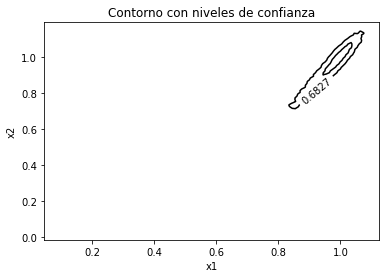

In [10]:
niveles_confianza = [sigma_1_confianza, sigma_2_confianza]
contour = plt.contour(X,Y,Z2,levels=niveles_confianza, colors='k')
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Contorno con niveles de confianza")
plt.show()

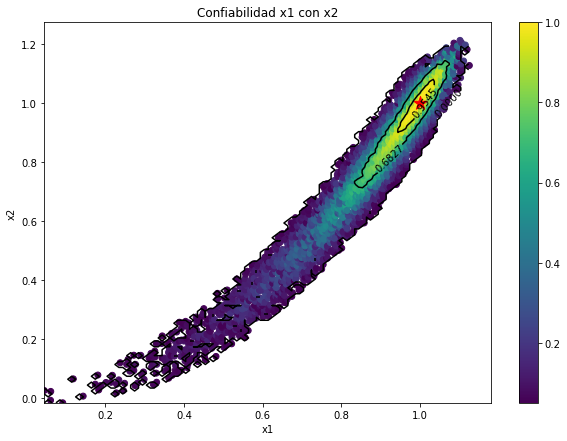

In [11]:
graficar_confidence(dm1,best1,X,Y,Z2)

In [12]:
best2,dm2 = regions_confidence(df,name="Confiabilidad x1 con x3",name1='x1',name2='x3')

In [13]:
best3,dm3 = regions_confidence(df,name="Confiabilidad x1 con x4",name1='x1',name2='x4')

In [14]:
best4,dm4 = regions_confidence(df,name="Confiabilidad x2 con x3",name1='x2',name2='x3')

In [15]:
best5,dm5 = regions_confidence(df,name="Confiabilidad x2 con x4",name1='x2',name2='x4')

In [16]:
best6,dm6 = regions_confidence(df,name="Confiabilidad x3 con x4",name1='x3',name2='x4')